In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Dummy Data HSS.csv')

In [97]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [98]:
#check descriptive stats 
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [4]:
#Create a dataframe that has the dummy variables for Influencer
df = pd.get_dummies(df, ['Influencer'], drop_first=True)
df

,TV,Radio,Social Media,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,1,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,1,0
4570,71.0,17.534640,1.940873,253.610411,0,0,0


In [128]:
#check the missing values
df.isna().sum()

TV                  10
Radio                4
Social Media         6
Sales                6
Influencer_Mega      0
Influencer_Micro     0
Influencer_Nano      0
dtype: int64

In [5]:
#fill missing valus 
df = df.fillna(df.mean())

In [130]:
df.isna().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TV                4572 non-null   float64
 1   Radio             4572 non-null   float64
 2   Social Media      4572 non-null   object 
 3   Sales             4572 non-null   float64
 4   Influencer_Mega   4572 non-null   uint8  
 5   Influencer_Micro  4572 non-null   uint8  
 6   Influencer_Nano   4572 non-null   uint8  
dtypes: float64(3), object(1), uint8(3)
memory usage: 156.4+ KB


In [131]:
#correlation studys
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,-0.011701,-0.004099,-0.003289
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.335465,-0.334495,1.000000


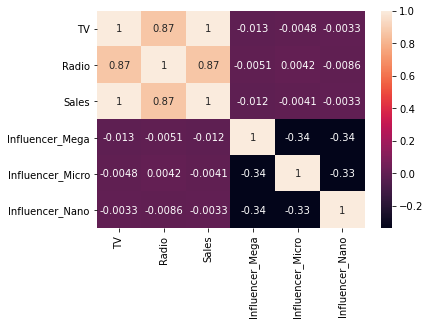

In [121]:
import seaborn as sns
ht = sns.heatmap(df.corr(),annot=True)

In [6]:
#extract dependent and independent variables
X = df.drop('Sales',axis=1)
y = df['Sales']

In [7]:
type(X)

pandas.core.frame.DataFrame

In [8]:
type(y)

pandas.core.series.Series

In [136]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.139e+05
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:03:14   Log-Likelihood:                -15748.
No. Observations:                4572   AIC:                         3.151e+04
Df Residuals:                    4565   BIC:                         3.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1780      0.332  

In [137]:
#Backward Feature Elimination
maxp = lr.pvalues.max()
while(maxp > 0.025):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.814e+06
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:03:43   Log-Likelihood:                         -15749.
No. Observations:                4572   AIC:                                  3.150e+04
Df Residuals:                    4570   BIC:                                  3.152e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [138]:
#Let's use sklearn to do Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [139]:
#check R^2 value
R2=model.score(X,y)
R2

0.9933668666733815

In [140]:
n = X.shape[0]
k = X.shape[1]
#Calculate Adj R^2 value
def adjR2(n,k,R2):
    return 1 - ((n-1)/(n-k-1))*(1-R2)

In [141]:
adjR2(n,k,R2)

0.9933581484258547

In [142]:
#split the data in training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=89,test_size=0.25)

In [143]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [144]:
#Training score 
R2 = lrmodel.score(X_train,y_train)
print('Training R2 =',R2) #r2 value
print('Training Adj-R2 =',adjR2(X_train.shape[0],X_train.shape[1],R2))

Training R2 = 0.9928669050628129
Training Adj-R2 = 0.9928543981751382


In [145]:
#Test score 
R2 = lrmodel.score(X_test,y_test)
print('Test R2 =',R2) #r2 value
print('Test Adj-R2 =',adjR2(X_test.shape[0],X_test.shape[1],R2))

Test R2 = 0.9948731557920498
Test Adj-R2 = 0.994846077389543


In [146]:
#k-fold cross validation using linear regression model
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.9930797856177609

In [148]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([324.78368832, 302.86032638, 292.19793443, ..., 341.45071895,
       227.75279686, 171.73305544])

In [149]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|)
print(mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]

2.630173060752087
43.75855853836033


In [150]:
model.intercept_

-0.177984565602884

In [151]:
model.coef_

array([3.512761  , 0.12263889, 0.05599117, 0.43300341, 0.41226441,
       0.37621142])